In [214]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import openpyxl as opxl

from itertools import islice
import datetime

In [215]:
# Cleans the main df
def clean_synergy_data(names, df, lista_rows):
    df_cons = pd.DataFrame(columns=df.columns)
    for i, value in enumerate(lista_rows):
        if i == 0:
            df2 = pd.DataFrame(df.iloc[0:lista_rows[i][1] - 3])
        else:
            df2 = pd.DataFrame(df.iloc[lista_rows[i-1][1] + 1:lista_rows[i][1] - 3])
        df2['name'] = names[i]
        fix_synergy_time(df2)
        df_cons = df_cons.append(df2, ignore_index=True, sort=False)
    return df_cons

In [216]:
# Changes time's format from datetime to fraction
def fix_synergy_time(df):
    t = np.array([])
    for i, value in enumerate(df['Time']):
        if i > 0:
            if df['Time'].iloc[i].hour < df['Time'].iloc[i-1].hour:
                t = np.append(t, [24 + value.hour + value.minute/60 + value.second/3600])
            else:
                t = np.append(t, [value.hour + value.minute/60 + value.second/3600])
        else:
            t = np.append(t, [value.hour + value.minute/60 + value.second/3600])
    df['Time'] = t

In [217]:
def lista_rows(ws, medidas):
    lista_rows = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
                  for celda in ws['A'] 
                  if celda.value in medidas]
    return lista_rows

In [218]:
def load_synergy_data(medidas, ws):
    rows = lista_rows(ws, medidas)
    ws.delete_rows(0, rows[0][1] + 1)
    rows = lista_rows(ws, medidas)

    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    df = pd.DataFrame(data, columns=cols)
    df = df.drop('T° OD600:600', axis=1)

    names = ['OD', 'RFP', 'YFP', 'CFP']
    df_cons = clean_synergy_data(names, df, rows)
    return df_cons

### Cargo metadata

In [177]:
# Probar cuando trae solamente un elemento en el arreglo, con strain solamente por ejemplo
data_str = open('MetaTest.json').read()
data = json.loads(data_str)

In [178]:
# Candidato 1

df_json = pd.read_json(data)
columns = [x+str(y) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] for y in range(1,13)]
df_json.columns = columns
df_json.index = ['Strain', 'Media', 'DNA']
df_json

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Strain,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}",...,"{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}"
Media,"{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}",...,"{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}"
DNA,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...",...,"{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF..."


In [179]:
json_df = df_json.to_json()

In [180]:
# Candidato 2

# Este funciona traspuesto. Candidato 1 mejor porque está en el mismo orden que el lector
"""
index = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
df_json = pd.read_json(data, orient='index')
df_json.columns = ['Strain', 'Media', 'DNA']
df_json.index = index
df_json
"""

"\nindex = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]\ndf_json = pd.read_json(data, orient='index')\ndf_json.columns = ['Strain', 'Media', 'DNA']\ndf_json.index = index\ndf_json\n"

In [219]:
###########
# Esta info debe ser recibida al inicio de la carga de datos
file_name = 'ExpTest.xlsx'
experiment_name = os.path.basename(file_name).split('/')[-1].split('.')[0]
medidas = ['OD600:600', 'RFP-YFP:585/10,620/15', 'RFP-YFP:500/27,540/25', 'CFP:420/50,485/20', 'Results']
wb = opxl.load_workbook(filename = file_name, data_only=True)
ws = wb['Data']
machine_name = ws['B'][8].value + str(ws['B'][9].value)

name_map = {'OD600:600':'OD', 'RFP-YFP:500/27,540/25':'YFP', 'CFP:420/50,485/20':'CFP',
'RFP-YFP:585/10,620/15':'RFP'}

### Cargo data

In [220]:
df_cons = load_synergy_data(medidas, ws)

,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,name
0,0.194444,0.082,0.083,0.083,0.082,0.082,0.082,0.083,0.083,0.084,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
1,0.444444,0.082,0.083,0.084,0.082,0.083,0.082,0.083,0.083,0.084,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
2,0.694444,0.082,0.084,0.084,0.082,0.083,0.083,0.084,0.084,0.085,...,0.082,0.084,0.082,0.088,0.083,0.082,0.083,0.081,0.084,OD
3,0.944444,0.082,0.085,0.084,0.082,0.084,0.083,0.085,0.084,0.087,...,0.083,0.084,0.082,0.089,0.083,0.083,0.083,0.081,0.084,OD
4,1.194444,0.082,0.085,0.085,0.082,0.084,0.084,0.086,0.085,0.088,...,0.083,0.084,0.082,0.09,0.083,0.083,0.083,0.081,0.084,OD
5,1.444444,0.081,0.086,0.086,0.083,0.085,0.085,0.087,0.086,0.09,...,0.083,0.084,0.082,0.09,0.084,0.083,0.083,0.081,0.085,OD
6,1.694444,0.081,0.088,0.087,0.083,0.085,0.086,0.089,0.087,0.094,...,0.083,0.084,0.082,0.09,0.084,0.083,0.084,0.082,0.085,OD
7,1.944444,0.081,0.089,0.088,0.084,0.086,0.088,0.091,0.089,0.098,...,0.083,0.085,0.083,0.09,0.084,0.084,0.084,0.082,0.085,OD
8,2.194444,0.081,0.092,0.09,0.084,0.088,0.09,0.094,0.092,0.104,...,0.083,0.085,0.083,0.09,0.085,0.084,0.085,0.083,0.085,OD
9,2.444444,0.081,0.095,0.092,0.085,0.09,0.092,0.097,0.096,0.11,...,0.084,0.085,0.083,0.087,0.085,0.085,0.085,0.083,0.085,OD


In [222]:
df_cons.columns

Index(['Time', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6',
       'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5',
       'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4',
       'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3',
       'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'name'],
      dtype='object')

### Guardar en BD

De más a menos:

1) Tabla Experiment => Meta experimento: Nombre experimento, (fecha? se puede ingresar en el front), Info máquina

2) Tabla Sample => Meta platillo: row, col, media, strain.

3) Tabla DNA => Meta DNA: name

4) Tabla Measurements => Data measurements: name, value, time

In [16]:
# 1) Experiment
experiment_name
machine_name
# Crear objeto experiment
# e.save()

'Synergy HTX15070916'

In [17]:
# 2) Sample
# get experiment_id
# row, col, media, strain

# 3) DNA
# name

# Empiezo a recorrer los platillos que están en df_json: indexes: strain, media, dna:
for col_name, col_serie in df_json.iteritems():
    # experiment_id
    plate_row = col_name[0]
    plate_col = col_name[1]
    strain = col_serie['Strain']['value']
    media = col_serie['Media']['value']
    # Crear objeto Sample
    # s.save()
    
    # get sample_id
    DNA = col_serie['DNA']['value']
    # Crear objeto DNA
    # d.save()
    
    # 4) Measurement
    # name, value, time
    for i, value in enumerate(df_OD[col_name]):
        name = df_OD['name'].iloc[i]
        val = value
        time = df_OD['Time'].iloc[i]
    #sample_id
    
    # Crear objeto measurement
    # m.save()

In [18]:
for col_name, col_serie in df_json.iteritems():
    for i, value in enumerate(df_OD[col_name]):
        print(df_OD['name'].iloc[i])
        print(value)
        print(df_OD['Time'].iloc[i])

OD
0.082
00:11:40
OD
0.082
00:26:40
OD
0.082
00:41:40
OD
0.082
00:56:40
OD
0.082
01:11:40
OD
0.081
01:26:40
OD
0.081
01:41:40
OD
0.081
01:56:40
OD
0.081
02:11:40
OD
0.081
02:26:40
OD
0.082
02:41:40
OD
0.081
02:56:40
OD
0.081
03:11:40
OD
0.081
03:26:40
OD
0.081
03:41:40
OD
0.081
03:56:40
OD
0.081
04:11:40
OD
0.081
04:26:40
OD
0.081
04:41:40
OD
0.081
04:56:40
OD
0.081
05:11:40
OD
0.081
05:26:40
OD
0.081
05:41:40
OD
0.082
05:56:40
OD
0.081
06:11:40
OD
0.081
06:26:40
OD
0.081
06:41:40
OD
0.082
06:56:40
OD
0.081
07:11:40
OD
0.082
07:26:40
OD
0.081
07:41:40
OD
0.081
07:56:40
OD
0.081
08:11:40
OD
0.081
08:26:40
OD
0.081
08:41:40
OD
0.081
08:56:40
OD
0.082
09:11:40
OD
0.081
09:26:40
OD
0.082
09:41:40
OD
0.082
09:56:40
OD
0.082
10:11:40
OD
0.081
10:26:40
OD
0.081
10:41:40
OD
0.082
10:56:40
OD
0.081
11:11:40
OD
0.081
11:26:40
OD
0.082
11:41:40
OD
0.081
11:56:40
OD
0.081
12:11:40
OD
0.082
12:26:40
OD
0.081
12:41:40
OD
0.082
12:56:40
OD
0.081
13:11:40
OD
0.081
13:26:40
OD
0.081
13:41:40
OD
0.081
1

05:41:40
OD
0.515
05:56:40
OD
0.574
06:11:40
OD
0.632
06:26:40
OD
0.655
06:41:40
OD
0.672
06:56:40
OD
0.669
07:11:40
OD
0.668
07:26:40
OD
0.674
07:41:40
OD
0.675
07:56:40
OD
0.677
08:11:40
OD
0.685
08:26:40
OD
0.693
08:41:40
OD
0.701
08:56:40
OD
0.729
09:11:40
OD
0.737
09:26:40
OD
0.746
09:41:40
OD
0.756
09:56:40
OD
0.765
10:11:40
OD
0.768
10:26:40
OD
0.776
10:41:40
OD
0.785
10:56:40
OD
0.799
11:11:40
OD
0.801
11:26:40
OD
0.815
11:41:40
OD
0.818
11:56:40
OD
0.827
12:11:40
OD
0.828
12:26:40
OD
0.828
12:41:40
OD
0.837
12:56:40
OD
0.842
13:11:40
OD
0.844
13:26:40
OD
0.85
13:41:40
OD
0.856
13:56:40
OD
0.863
14:11:40
OD
0.872
14:26:40
OD
0.87
14:41:40
OD
0.872
14:56:40
OD
0.883
15:11:40
OD
0.884
15:26:40
OD
0.886
15:41:40
OD
0.894
15:56:40
OD
0.899
16:11:40
OD
0.893
16:26:40
OD
0.896
16:41:40
OD
0.897
16:56:40
OD
0.887
17:11:40
OD
0.887
17:26:40
OD
0.894
17:41:40
OD
0.911
17:56:40
OD
0.933
18:11:40
OD
0.915
18:26:40
OD
0.909
18:41:40
OD
0.906
18:56:40
OD
0.901
19:11:40
OD
0.898
19:26:40
OD


21:56:40
OD
0.877
22:11:40
OD
0.863
22:26:40
OD
0.851
22:41:40
OD
0.842
22:56:40
OD
0.839
23:11:40
OD
0.839
23:26:40
OD
0.84
23:41:40
OD
0.841
23:56:40
OD
0.082
00:11:40
OD
0.082
00:26:40
OD
0.082
00:41:40
OD
0.082
00:56:40
OD
0.083
01:11:40
OD
0.083
01:26:40
OD
0.084
01:41:40
OD
0.086
01:56:40
OD
0.087
02:11:40
OD
0.089
02:26:40
OD
0.092
02:41:40
OD
0.095
02:56:40
OD
0.099
03:11:40
OD
0.105
03:26:40
OD
0.113
03:41:40
OD
0.124
03:56:40
OD
0.138
04:11:40
OD
0.155
04:26:40
OD
0.175
04:41:40
OD
0.198
04:56:40
OD
0.227
05:11:40
OD
0.264
05:26:40
OD
0.306
05:41:40
OD
0.349
05:56:40
OD
0.398
06:11:40
OD
0.449
06:26:40
OD
0.501
06:41:40
OD
0.556
06:56:40
OD
0.598
07:11:40
OD
0.631
07:26:40
OD
0.655
07:41:40
OD
0.659
07:56:40
OD
0.656
08:11:40
OD
0.659
08:26:40
OD
0.665
08:41:40
OD
0.672
08:56:40
OD
0.693
09:11:40
OD
0.708
09:26:40
OD
0.714
09:41:40
OD
0.731
09:56:40
OD
0.735
10:11:40
OD
0.736
10:26:40
OD
0.741
10:41:40
OD
0.755
10:56:40
OD
0.76
11:11:40
OD
0.789
11:26:40
OD
0.812
11:41:40
OD


OD
0.864
14:26:40
OD
0.859
14:41:40
OD
0.861
14:56:40
OD
0.868
15:11:40
OD
0.866
15:26:40
OD
0.869
15:41:40
OD
0.873
15:56:40
OD
0.875
16:11:40
OD
0.872
16:26:40
OD
0.873
16:41:40
OD
0.871
16:56:40
OD
0.866
17:11:40
OD
0.867
17:26:40
OD
0.87
17:41:40
OD
0.879
17:56:40
OD
0.895
18:11:40
OD
0.881
18:26:40
OD
0.875
18:41:40
OD
0.872
18:56:40
OD
0.867
19:11:40
OD
0.865
19:26:40
OD
0.862
19:41:40
OD
0.861
19:56:40
OD
0.887
20:11:40
OD
0.886
20:26:40
OD
0.884
20:41:40
OD
0.897
20:56:40
OD
0.905
21:11:40
OD
0.903
21:26:40
OD
0.893
21:41:40
OD
0.892
21:56:40
OD
0.888
22:11:40
OD
0.881
22:26:40
OD
0.874
22:41:40
OD
0.87
22:56:40
OD
0.869
23:11:40
OD
0.87
23:26:40
OD
0.871
23:41:40
OD
0.873
23:56:40
OD
0.085
00:11:40
OD
0.086
00:26:40
OD
0.087
00:41:40
OD
0.088
00:56:40
OD
0.089
01:11:40
OD
0.091
01:26:40
OD
0.094
01:41:40
OD
0.097
01:56:40
OD
0.102
02:11:40
OD
0.108
02:26:40
OD
0.115
02:41:40
OD
0.124
02:56:40
OD
0.135
03:11:40
OD
0.15
03:26:40
OD
0.168
03:41:40
OD
0.194
03:56:40
OD
0.227
04:11

OD
0.721
06:41:40
OD
0.788
06:56:40
OD
0.808
07:11:40
OD
0.835
07:26:40
OD
0.858
07:41:40
OD
0.854
07:56:40
OD
0.851
08:11:40
OD
0.853
08:26:40
OD
0.863
08:41:40
OD
0.871
08:56:40
OD
0.882
09:11:40
OD
0.893
09:26:40
OD
0.894
09:41:40
OD
0.903
09:56:40
OD
0.906
10:11:40
OD
0.904
10:26:40
OD
0.901
10:41:40
OD
0.915
10:56:40
OD
0.923
11:11:40
OD
0.952
11:26:40
OD
0.973
11:41:40
OD
0.969
11:56:40
OD
0.966
12:11:40
OD
0.958
12:26:40
OD
0.96
12:41:40
OD
0.972
12:56:40
OD
0.974
13:11:40
OD
0.977
13:26:40
OD
0.987
13:41:40
OD
0.989
13:56:40
OD
0.983
14:11:40
OD
0.988
14:26:40
OD
0.993
14:41:40
OD
0.987
14:56:40
OD
0.999
15:11:40
OD
1.008
15:26:40
OD
0.999
15:41:40
OD
1.014
15:56:40
OD
1.012
16:11:40
OD
1.002
16:26:40
OD
1.003
16:41:40
OD
1.002
16:56:40
OD
0.985
17:11:40
OD
0.985
17:26:40
OD
0.991
17:41:40
OD
1.008
17:56:40
OD
1.017
18:11:40
OD
1.013
18:26:40
OD
1.004
18:41:40
OD
0.994
18:56:40
OD
0.982
19:11:40
OD
0.977
19:26:40
OD
0.971
19:41:40
OD
0.969
19:56:40
OD
1.007
20:11:40
OD
1.024
20

0.75
22:56:40
OD
0.75
23:11:40
OD
0.749
23:26:40
OD
0.746
23:41:40
OD
0.745
23:56:40
OD
0.085
00:11:40
OD
0.085
00:26:40
OD
0.086
00:41:40
OD
0.087
00:56:40
OD
0.088
01:11:40
OD
0.09
01:26:40
OD
0.092
01:41:40
OD
0.095
01:56:40
OD
0.1
02:11:40
OD
0.106
02:26:40
OD
0.115
02:41:40
OD
0.125
02:56:40
OD
0.14
03:11:40
OD
0.159
03:26:40
OD
0.183
03:41:40
OD
0.217
03:56:40
OD
0.252
04:11:40
OD
0.297
04:26:40
OD
0.349
04:41:40
OD
0.404
04:56:40
OD
0.476
05:11:40
OD
0.543
05:26:40
OD
0.625
05:41:40
OD
0.709
05:56:40
OD
0.781
06:11:40
OD
0.826
06:26:40
OD
0.826
06:41:40
OD
0.829
06:56:40
OD
0.823
07:11:40
OD
0.814
07:26:40
OD
0.818
07:41:40
OD
0.817
07:56:40
OD
0.815
08:11:40
OD
0.82
08:26:40
OD
0.831
08:41:40
OD
0.849
08:56:40
OD
0.864
09:11:40
OD
0.874
09:26:40
OD
0.878
09:41:40
OD
0.896
09:56:40
OD
0.906
10:11:40
OD
0.907
10:26:40
OD
0.913
10:41:40
OD
0.927
10:56:40
OD
0.929
11:11:40
OD
0.951
11:26:40
OD
0.967
11:41:40
OD
0.971
11:56:40
OD
0.974
12:11:40
OD
0.966
12:26:40
OD
0.969
12:41:40
OD

0.6
15:11:40
OD
0.609
15:26:40
OD
0.624
15:41:40
OD
0.637
15:56:40
OD
0.646
16:11:40
OD
0.659
16:26:40
OD
0.683
16:41:40
OD
0.69
16:56:40
OD
0.686
17:11:40
OD
0.689
17:26:40
OD
0.698
17:41:40
OD
0.723
17:56:40
OD
0.754
18:11:40
OD
0.735
18:26:40
OD
0.734
18:41:40
OD
0.73
18:56:40
OD
0.725
19:11:40
OD
0.723
19:26:40
OD
0.719
19:41:40
OD
0.717
19:56:40
OD
0.764
20:11:40
OD
0.762
20:26:40
OD
0.759
20:41:40
OD
0.782
20:56:40
OD
0.806
21:11:40
OD
0.801
21:26:40
OD
0.782
21:41:40
OD
0.779
21:56:40
OD
0.772
22:11:40
OD
0.762
22:26:40
OD
0.75
22:41:40
OD
0.742
22:56:40
OD
0.743
23:11:40
OD
0.747
23:26:40
OD
0.752
23:41:40
OD
0.753
23:56:40
OD
0.082
00:11:40
OD
0.082
00:26:40
OD
0.082
00:41:40
OD
0.082
00:56:40
OD
0.082
01:11:40
OD
0.082
01:26:40
OD
0.082
01:41:40
OD
0.082
01:56:40
OD
0.082
02:11:40
OD
0.083
02:26:40
OD
0.083
02:41:40
OD
0.083
02:56:40
OD
0.083
03:11:40
OD
0.085
03:26:40
OD
0.085
03:41:40
OD
0.085
03:56:40
OD
0.087
04:11:40
OD
0.088
04:26:40
OD
0.089
04:41:40
OD
0.091
04:56:40


OD
0.082
10:56:40
OD
0.082
11:11:40
OD
0.082
11:26:40
OD
0.082
11:41:40
OD
0.082
11:56:40
OD
0.082
12:11:40
OD
0.082
12:26:40
OD
0.082
12:41:40
OD
0.082
12:56:40
OD
0.082
13:11:40
OD
0.082
13:26:40
OD
0.082
13:41:40
OD
0.082
13:56:40
OD
0.082
14:11:40
OD
0.082
14:26:40
OD
0.082
14:41:40
OD
0.082
14:56:40
OD
0.082
15:11:40
OD
0.082
15:26:40
OD
0.082
15:41:40
OD
0.082
15:56:40
OD
0.082
16:11:40
OD
0.082
16:26:40
OD
0.082
16:41:40
OD
0.082
16:56:40
OD
0.082
17:11:40
OD
0.082
17:26:40
OD
0.082
17:41:40
OD
0.082
17:56:40
OD
0.082
18:11:40
OD
0.082
18:26:40
OD
0.082
18:41:40
OD
0.082
18:56:40
OD
0.082
19:11:40
OD
0.082
19:26:40
OD
0.082
19:41:40
OD
0.083
19:56:40
OD
0.082
20:11:40
OD
0.082
20:26:40
OD
0.082
20:41:40
OD
0.082
20:56:40
OD
0.082
21:11:40
OD
0.082
21:26:40
OD
0.082
21:41:40
OD
0.082
21:56:40
OD
0.082
22:11:40
OD
0.082
22:26:40
OD
0.082
22:41:40
OD
0.082
22:56:40
OD
0.082
23:11:40
OD
0.082
23:26:40
OD
0.082
23:41:40
OD
0.082
23:56:40
OD
0.084
00:11:40
OD
0.084
00:26:40
OD
0.084
0

0.741
17:26:40
OD
0.745
17:41:40
OD
0.747
17:56:40
OD
0.741
18:11:40
OD
0.739
18:26:40
OD
0.741
18:41:40
OD
0.744
18:56:40
OD
0.746
19:11:40
OD
0.748
19:26:40
OD
0.749
19:41:40
OD
0.749
19:56:40
OD
0.747
20:11:40
OD
0.764
20:26:40
OD
0.787
20:41:40
OD
0.781
20:56:40
OD
0.773
21:11:40
OD
0.774
21:26:40
OD
0.784
21:41:40
OD
0.786
21:56:40
OD
0.786
22:11:40
OD
0.782
22:26:40
OD
0.779
22:41:40
OD
0.776
22:56:40
OD
0.773
23:11:40
OD
0.773
23:26:40
OD
0.775
23:41:40
OD
0.775
23:56:40
OD
0.091
00:11:40
OD
0.094
00:26:40
OD
0.102
00:41:40
OD
0.088
00:56:40
OD
0.087
01:11:40
OD
0.091
01:26:40
OD
0.091
01:41:40
OD
0.097
01:56:40
OD
0.091
02:11:40
OD
0.099
02:26:40
OD
0.09
02:41:40
OD
0.099
02:56:40
OD
0.104
03:11:40
OD
0.087
03:26:40
OD
0.086
03:41:40
OD
0.09
03:56:40
OD
0.1
04:11:40
OD
0.095
04:26:40
OD
0.093
04:41:40
OD
0.103
04:56:40
OD
0.097
05:11:40
OD
0.097
05:26:40
OD
0.101
05:41:40
OD
0.096
05:56:40
OD
0.099
06:11:40
OD
0.103
06:26:40
OD
0.107
06:41:40
OD
0.112
06:56:40
OD
0.12
07:11:40


09:41:40
OD
0.363
09:56:40
OD
0.384
10:11:40
OD
0.4
10:26:40
OD
0.418
10:41:40
OD
0.437
10:56:40
OD
0.453
11:11:40
OD
0.485
11:26:40
OD
0.533
11:41:40
OD
0.557
11:56:40
OD
0.578
12:11:40
OD
0.59
12:26:40
OD
0.61
12:41:40
OD
0.638
12:56:40
OD
0.653
13:11:40
OD
0.674
13:26:40
OD
0.698
13:41:40
OD
0.711
13:56:40
OD
0.72
14:11:40
OD
0.738
14:26:40
OD
0.745
14:41:40
OD
0.772
14:56:40
OD
0.792
15:11:40
OD
0.785
15:26:40
OD
0.798
15:41:40
OD
0.809
15:56:40
OD
0.813
16:11:40
OD
0.808
16:26:40
OD
0.814
16:41:40
OD
0.816
16:56:40
OD
0.809
17:11:40
OD
0.812
17:26:40
OD
0.815
17:41:40
OD
0.836
17:56:40
OD
0.859
18:11:40
OD
0.838
18:26:40
OD
0.835
18:41:40
OD
0.833
18:56:40
OD
0.827
19:11:40
OD
0.825
19:26:40
OD
0.82
19:41:40
OD
0.818
19:56:40
OD
0.866
20:11:40
OD
0.868
20:26:40
OD
0.872
20:41:40
OD
0.892
20:56:40
OD
0.902
21:11:40
OD
0.917
21:26:40
OD
0.919
21:41:40
OD
0.919
21:56:40
OD
0.915
22:11:40
OD
0.905
22:26:40
OD
0.893
22:41:40
OD
0.885
22:56:40
OD
0.883
23:11:40
OD
0.881
23:26:40
OD
0.88

01:56:40
OD
0.085
02:11:40
OD
0.085
02:26:40
OD
0.086
02:41:40
OD
0.086
02:56:40
OD
0.087
03:11:40
OD
0.088
03:26:40
OD
0.089
03:41:40
OD
0.09
03:56:40
OD
0.092
04:11:40
OD
0.094
04:26:40
OD
0.097
04:41:40
OD
0.1
04:56:40
OD
0.105
05:11:40
OD
0.109
05:26:40
OD
0.113
05:41:40
OD
0.118
05:56:40
OD
0.123
06:11:40
OD
0.128
06:26:40
OD
0.135
06:41:40
OD
0.141
06:56:40
OD
0.152
07:11:40
OD
0.161
07:26:40
OD
0.168
07:41:40
OD
0.18
07:56:40
OD
0.192
08:11:40
OD
0.203
08:26:40
OD
0.214
08:41:40
OD
0.227
08:56:40
OD
0.24
09:11:40
OD
0.257
09:26:40
OD
0.274
09:41:40
OD
0.29
09:56:40
OD
0.308
10:11:40
OD
0.323
10:26:40
OD
0.34
10:41:40
OD
0.355
10:56:40
OD
0.371
11:11:40
OD
0.387
11:26:40
OD
0.41
11:41:40
OD
0.428
11:56:40
OD
0.445
12:11:40
OD
0.46
12:26:40
OD
0.474
12:41:40
OD
0.49
12:56:40
OD
0.504
13:11:40
OD
0.518
13:26:40
OD
0.537
13:41:40
OD
0.55
13:56:40
OD
0.56
14:11:40
OD
0.571
14:26:40
OD
0.583
14:41:40
OD
0.611
14:56:40
OD
0.621
15:11:40
OD
0.623
15:26:40
OD
0.625
15:41:40
OD
0.626
15:5

In [19]:
df_json.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4',
       'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
      dtype='object')

In [46]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
columnas.insert(0, 'Time')
df_OD[columnas].to_json(orient='records')

'[{"Time":"00:11:40","C3":0.085,"C4":0.083,"C5":0.082,"C6":0.083,"C7":0.082,"D3":0.084,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.081},{"Time":"00:26:40","C3":0.086,"C4":0.083,"C5":0.082,"C6":0.082,"C7":0.082,"D3":0.084,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.081},{"Time":"00:41:40","C3":0.087,"C4":0.083,"C5":0.082,"C6":0.083,"C7":0.083,"D3":0.085,"D4":0.083,"D5":0.083,"D6":0.082,"D7":0.082},{"Time":"00:56:40","C3":0.088,"C4":0.084,"C5":0.082,"C6":0.083,"C7":0.083,"D3":0.085,"D4":0.084,"D5":0.083,"D6":0.082,"D7":0.082},{"Time":"01:11:40","C3":0.089,"C4":0.084,"C5":0.083,"C6":0.083,"C7":0.083,"D3":0.086,"D4":0.084,"D5":0.084,"D6":0.083,"D7":0.083},{"Time":"01:26:40","C3":0.091,"C4":0.085,"C5":0.083,"C6":0.084,"C7":0.084,"D3":0.087,"D4":0.085,"D5":0.084,"D6":0.083,"D7":0.084},{"Time":"01:41:40","C3":0.094,"C4":0.086,"C5":0.084,"C6":0.085,"C7":0.084,"D3":0.088,"D4":0.086,"D5":0.085,"D6":0.084,"D7":0.085},{"Time":"01:56:40","C3":0.097,"C4":0.087,"C5":0.084,"C6":0.085,"C7":0.085,"D3":0.09,"D4"

In [ ]:
# Name = OD --> Measurement
# Strain = Top10 --> Sample
# Media = M9-glucosa --> Sample
# Dna = pLux76:RFP/pTet:YFP/std:CFP --> Dna

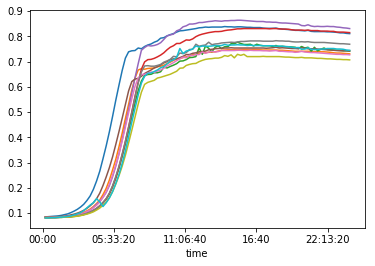

In [48]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
for i in columnas:
    #print(i)
    plt.plot(df_OD['Time'], df_OD[i])
plt.show()

In [ ]:
# El gráfico anterior corresponde al siguiente filtro
measurement_name = 'OD'
strain = 'Top10'
media = 'M9-glucosa'
dna= 'pLux76:RFP/pTet:YFP/std:CFP'